In [1]:
# https://spiceypy.readthedocs.io/en/main/exampleone.html
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
import spiceypy as spice
spice.tkvrsn("TOOLKIT")

'CSPICE_N0067'

In [3]:
spice.furnsh("./Cassini_data/cassMetaK.txt")

In [4]:
step = 4000
# we are going to get positions between these two dates
utc = ['Jun 20, 2004', 'Dec 1, 2005']

# get et values one and two, we could vectorize str2et
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])
print("ET One: {}, ET Two: {}".format(etOne, etTwo))


ET One: 140961664.18440723, ET Two: 186667264.18308285


In [5]:
# get times
times = [x*(etTwo-etOne)/step + etOne for x in range(step)]

# check first few times:
print(times[0:3])


[140961664.18440723, 140973090.5844069, 140984516.98440656]


In [6]:
# check the documentation on spkpos before continuing
help(spice.spkpos)



Help on function spkpos in module spiceypy.spiceypy:

spkpos(targ: str, et: Union[float, numpy.ndarray], ref: str, abcorr: str, obs: str) -> Union[Tuple[numpy.ndarray, float], Tuple[numpy.ndarray, numpy.ndarray]]
    Return the position of a target body relative to an observing
    body, optionally corrected for light time (planetary aberration)
    and stellar aberration.
    
    https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/spkpos_c.html
    
    :param targ: Target body name.
    :param et: Observer epoch.
    :param ref: Reference frame of output position vector.
    :param abcorr: Aberration correction flag.
    :param obs: Observing body name.
    :return:
            Position of target,
            One way light time between observer and target.



In [7]:
#Run spkpos as a vectorized function
positions, lightTimes = spice.spkpos(
    'Cassini', times, 'J2000', 'NONE', 'SATURN BARYCENTER')

# Positions is a 3xN vector of XYZ positions
print("Positions: ")
print(positions[0])

# Light times is a N vector of time
print("Light Times: ")
print(lightTimes[0])



Positions: 
[-5461446.61080924 -4434793.40785864 -1200385.93315424]
Light Times: 
23.806223878250965


In [8]:
# Clean up the kernels
spice.kclear()


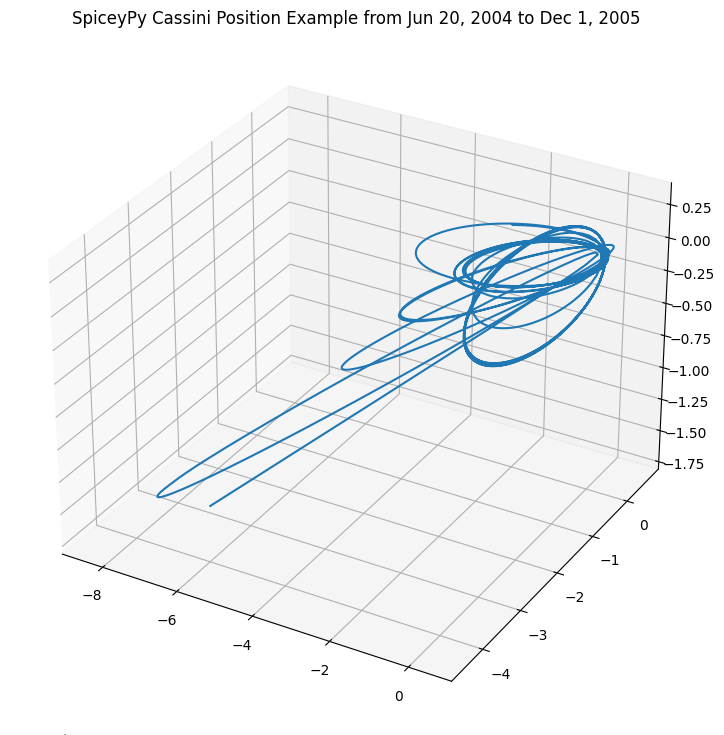

In [9]:

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions.T[0], positions.T[1], positions.T[2])
plt.title('SpiceyPy Cassini Position Example from Jun 20, 2004 to Dec 1, 2005')
plt.show()


In [17]:
# Normalzie position values between -1 and 1 for all axes, independently
max_vals = np.amax(np.abs(positions), axis=0)
final_positions = np.divide(positions, max_vals)


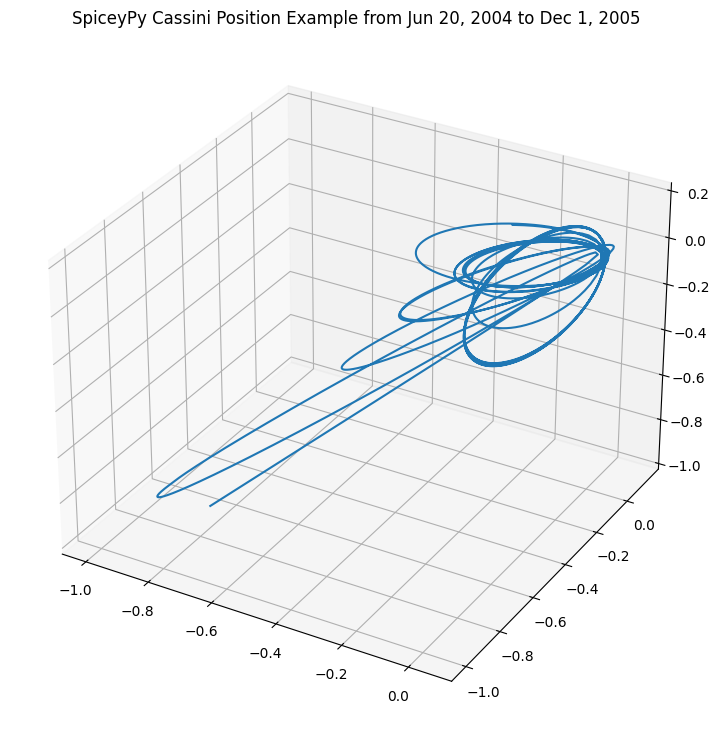

In [18]:

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(final_positions.T[0], final_positions.T[1], final_positions.T[2])
plt.title('SpiceyPy Cassini Position Example from Jun 20, 2004 to Dec 1, 2005')
plt.show()


In [19]:
with open("cassini_pos.txt", "w") as cassini_file:
    for pos in final_positions:
        cassini_file.write(f"{pos[0]} {pos[1]} {pos[2]}\n")
